                                    Applied MultiVariate Statistics (TERM 3)

                                                Assignment 2 

#### Name   : Navin Babu
#### Roll No: 2020DMF03

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import pylab as py
import math 
from scipy import stats
from scipy.special import ndtri
 
%matplotlib inline                    #import all the necessary packages

UsageError: unrecognized arguments: #import all the necessary packages


In [2]:
df = pd.read_excel(r'A:\Madras School of Economics\Term 3\MVA\Assignment\state_wise_daily Raw1.xlsx')
df                                 #read the COVID excelsheet

,Date,Date_YMD,Status,KL
0,2020-03-14,2020-03-14,Confirmed,19
1,2020-03-14,2020-03-14,Recovered,3
2,2020-03-14,2020-03-14,Deceased,0
3,2020-03-15,2020-03-15,Confirmed,5
4,2020-03-15,2020-03-15,Recovered,0
...,...,...,...,...
1000,2021-02-10,2021-02-10,Recovered,5745
1001,2021-02-10,2021-02-10,Deceased,18
1002,2021-02-11,2021-02-11,Confirmed,5281
1003,2021-02-11,2021-02-11,Recovered,5692


In [3]:
totalcases_df = df[df["Status"] == 'Confirmed']
totalcases_df                                    #filtering confirmed cases

,Date,Date_YMD,Status,KL
0,2020-03-14,2020-03-14,Confirmed,19
3,2020-03-15,2020-03-15,Confirmed,5
6,2020-03-16,2020-03-16,Confirmed,3
9,2020-03-17,2020-03-17,Confirmed,0
12,2020-03-18,2020-03-18,Confirmed,0
...,...,...,...,...
990,2021-02-07,2021-02-07,Confirmed,6075
993,2021-02-08,2021-02-08,Confirmed,3742
996,2021-02-09,2021-02-09,Confirmed,5214
999,2021-02-10,2021-02-10,Confirmed,5980


In [4]:
deceased_df = df[df["Status"] == 'Deceased']
deceased_df                                         #filtering deceased cases

,Date,Date_YMD,Status,KL
2,2020-03-14,2020-03-14,Deceased,0
5,2020-03-15,2020-03-15,Deceased,0
8,2020-03-16,2020-03-16,Deceased,0
11,2020-03-17,2020-03-17,Deceased,0
14,2020-03-18,2020-03-18,Deceased,0
...,...,...,...,...
992,2021-02-07,2021-02-07,Deceased,19
995,2021-02-08,2021-02-08,Deceased,16
998,2021-02-09,2021-02-09,Deceased,19
1001,2021-02-10,2021-02-10,Deceased,18


### a) For each of the two variables, draw a histogram and overlay the normal density to observe the departure if any from normality to the two variables in earlier assignment. Use kernel density approach to overlay the normal graph.

##### For Confirmed cases

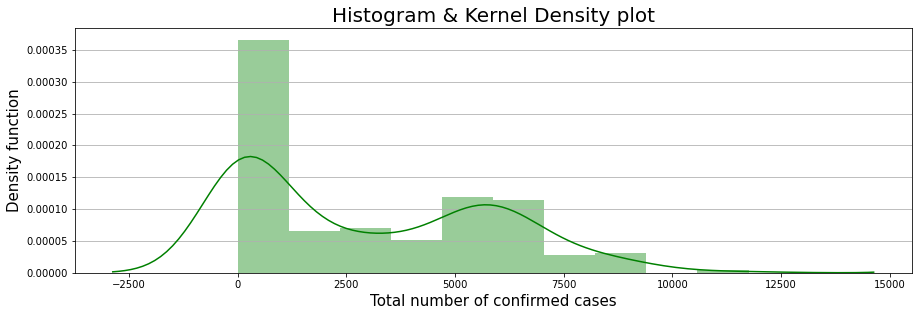

In [147]:
plt.figure(figsize=(15,4.5))
sns.distplot(totalcases_df['KL'], hist = True, bins=10, kde = True, color = 'green')
plt.title("Histogram & Kernel Density plot", fontsize=20)
plt.xlabel("Total number of confirmed cases", fontsize=15)
plt.ylabel("Density function", fontsize=15)
plt.grid(axis='y')

##### For Deceased cases

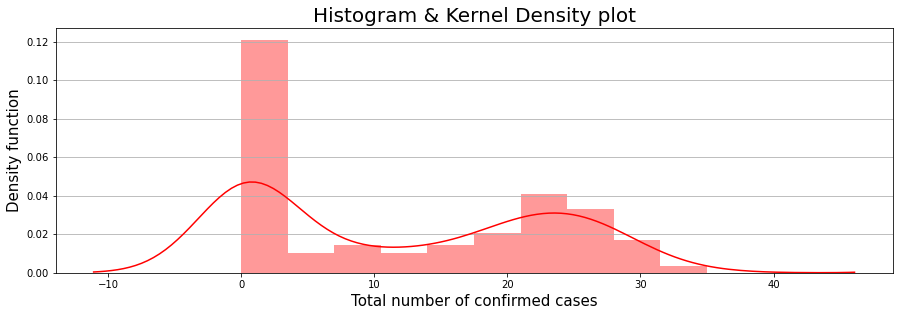

In [125]:
plt.figure(figsize=(15,4.5))
sns.distplot(deceased_df['KL'], hist = True, bins=10, kde = True, color = 'red')
plt.title("Histogram & Kernel Density plot", fontsize=20)
plt.xlabel("Total number of confirmed cases", fontsize=15)
plt.ylabel("Density function", fontsize=15)
plt.grid(axis='y')

### b) Draw the bivariate normality pdf and also assess the shape of the contour for normality and comment on the correlation between the two variables.

In [126]:
correlation = totalcases_df['KL'].corr(deceased_df["KL"])
correlation     #From the data, we get the information that there is no correlation between Confirmed cases and Deceased cases

nan

##### For Confirmed Cases

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

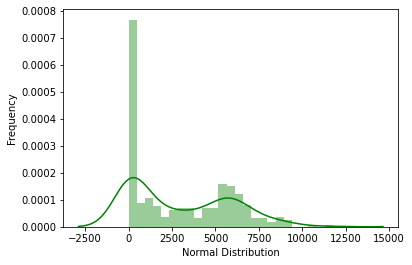

In [146]:
nd_tc = sns.distplot(totalcases_df['KL'], bins=25, kde=True, color='green')
nd_tc.set(xlabel = 'Normal Distribution', ylabel='Frequency')

##### For Deceased Cases

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

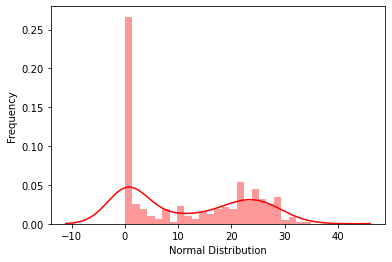

In [128]:
nd_dc = sns.distplot(deceased_df['KL'], bins=25, kde=True, color='red')
nd_dc.set(xlabel = 'Normal Distribution', ylabel='Frequency')

##### Contour Plot

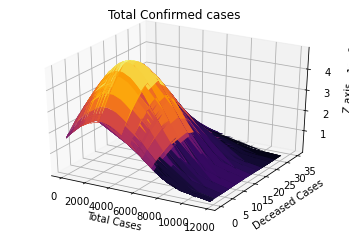

In [164]:
x_mean = totalcases_df['KL'].mean()
y_mean = deceased_df['KL'].mean()
x_var = totalcases_df['KL'].var()
y_var = deceased_df['KL'].var()
x_tc = totalcases_df['KL']
y_dc = deceased_df['KL']
X,Y = np.meshgrid(x_tc,y_dc)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([x_mean, y_mean], [[x_var, 0], [0, y_var]])
Z = rv.pdf(pos)
contourplot = plt.figure()
tcdc_contour = contourplot.gca(projection = '3d')
tcdc_contour.plot_surface(X, Y, Z, cmap='inferno', linewidth = 0)
tcdc_contour.set_xlabel('Total Cases')
tcdc_contour.set_ylabel('Deceased Cases')
tcdc_contour.set_zlabel('Z axis')
tcdc_contour.set_title('Total Confirmed cases')

plt.show()

### c) Check if the two variables (Total Cases & Deceased Cases) are normally distributed.

##### For Confirmed Cases

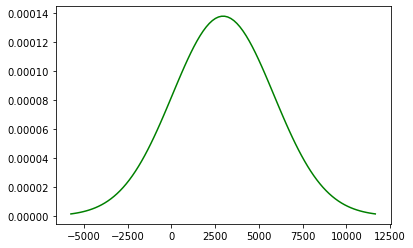

In [145]:
x_mean = totalcases_df['KL'].mean()
x_var = totalcases_df['KL'].var()
sigma_x = math.sqrt(var_x)
x = np.linspace(x_mean - 3*sigma_x, x_mean + 3*sigma_x, 100)
plt.plot(x, stats.norm.pdf(x, x_mean, sigma_x), color = 'green')

plt.show()

##### For Deceased Cases

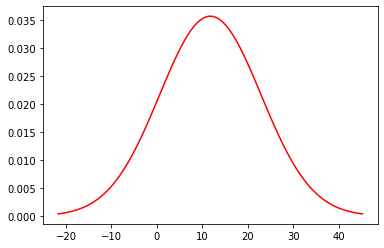

In [144]:
y_mean = deceased_df['KL'].mean()
y_var = deceased_df['KL'].var()
sigma_y = math.sqrt(var_y)
y = np.linspace(y_mean - 3*sigma_y, y_mean + 3*sigma_y, 100)
plt.plot(y, stats.norm.pdf(y, y_mean, sigma_y), color = 'red')

plt.show()

### d) Use the Q-Q plot approach for each of the variables and verify further the departure if any from normality

##### For Confirmed cases

In [150]:
conf_df = totalcases_df.sort_values(by=['KL'],ascending=True).reset_index()

In [151]:
conf_df['count'] =conf_df.index+1
df.head()

,index,Date,Date_YMD,Status,KL,count,percentile_area,z_theoritical,z_actual
0,9,2020-03-17,2020-03-17,Confirmed,0,1,0.002985,-2.749416,-1.019588
1,12,2020-03-18,2020-03-18,Confirmed,0,2,0.005970,-2.513904,-1.019588
2,159,2020-05-06,2020-05-06,Confirmed,0,3,0.008955,-2.367464,-1.019588
3,153,2020-05-04,2020-05-04,Confirmed,0,4,0.011940,-2.259045,-1.019588
4,150,2020-05-03,2020-05-03,Confirmed,0,5,0.014925,-2.172065,-1.019588


In [152]:
n_rows = conf_df.shape[0]
conf_df['percentile_area'] = (conf_df['count'])/n_rows
conf_df['z_theoritical'] = ndtri(conf_df['percentile_area'])
conf_df['z_actual'] = (conf_df['KL'] - conf_df['KL'].mean())/conf_df['KL'].std(ddof=0)
conf_df.head()

,index,Date,Date_YMD,Status,KL,count,percentile_area,z_theoritical,z_actual
0,9,2020-03-17,2020-03-17,Confirmed,0,1,0.002985,-2.749416,-1.019588
1,12,2020-03-18,2020-03-18,Confirmed,0,2,0.005970,-2.513904,-1.019588
2,159,2020-05-06,2020-05-06,Confirmed,0,3,0.008955,-2.367464,-1.019588
3,153,2020-05-04,2020-05-04,Confirmed,0,4,0.011940,-2.259045,-1.019588
4,150,2020-05-03,2020-05-03,Confirmed,0,5,0.014925,-2.172065,-1.019588


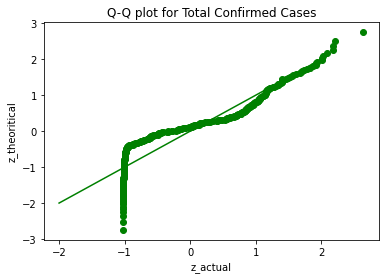

In [163]:
plt.scatter(conf_df.z_actual, conf_df.z_theoritical, color = 'green')
plt.plot([-2,-1,0,1,2],[-2,-1,0,1,2], color = 'green')
plt.xlabel('z_actual')
plt.ylabel('z_theoritical')
plt.title('Q-Q plot for Total Confirmed Cases')
plt.show()

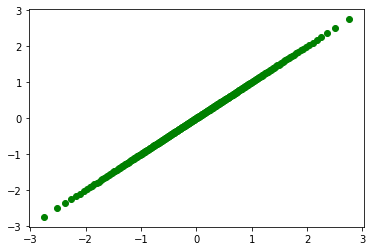

In [160]:
plt.scatter(conf_df.z_theoritical, conf_df.z_theoritical, color = 'green')
plt.plot([-2,-1,0,1,2],[-2,-1,0,1,2], color = 'green')

##### For Deceased Cases

In [156]:
dec_df = deceased_df.sort_values(by=['KL'],ascending=True).reset_index()
dec_df['count'] =dec_df.index+1
dec_df.head()

,index,Date,Date_YMD,Status,KL,count
0,2,2020-03-14,2020-03-14,Deceased,0,1
1,224,2020-05-27,2020-05-27,Deceased,0,2
2,218,2020-05-25,2020-05-25,Deceased,0,3
3,212,2020-05-23,2020-05-23,Deceased,0,4
4,206,2020-05-21,2020-05-21,Deceased,0,5


In [157]:
n_rows = dec_df.shape[0]
dec_df['percentile_area'] = (dec_df['count'])/n_rows
dec_df['z_theoritical'] = ndtri(dec_df['percentile_area'])
dec_df['z_actual'] = (dec_df['KL'] - dec_df['KL'].mean())/dec_df['KL'].std(ddof=0)
dec_df.head()

,index,Date,Date_YMD,Status,KL,count,percentile_area,z_theoritical,z_actual
0,2,2020-03-14,2020-03-14,Deceased,0,1,0.002985,-2.749416,-1.054996
1,224,2020-05-27,2020-05-27,Deceased,0,2,0.005970,-2.513904,-1.054996
2,218,2020-05-25,2020-05-25,Deceased,0,3,0.008955,-2.367464,-1.054996
3,212,2020-05-23,2020-05-23,Deceased,0,4,0.011940,-2.259045,-1.054996
4,206,2020-05-21,2020-05-21,Deceased,0,5,0.014925,-2.172065,-1.054996


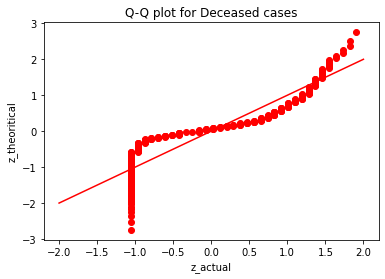

In [162]:
plt.scatter(dec_df.z_actual, dec_df.z_theoritical, color = 'red')
plt.plot([-2,-1,0,1,2],[-2,-1,0,1,2], color = 'red')
plt.xlabel('z_actual')
plt.ylabel('z_theoritical')
plt.title('Q-Q plot for Deceased cases')
plt.show()

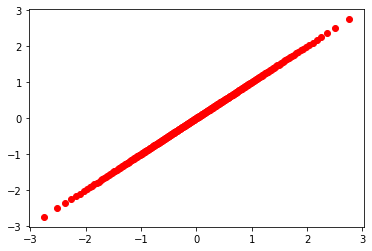

In [159]:
plt.scatter(dec_df.z_theoritical, dec_df.z_theoritical, color = 'red')
plt.plot([-2,-1,0,1,2],[-2,-1,0,1,2], color = 'red')